In [5]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as  plt
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Dense, Flatten, Reshape

In [7]:
df = pd.read_csv("../../data/csv_files/df_ph1.csv")

In [9]:
df.shape

(7748, 10)

In [11]:
stations_name = list(df.columns)
stations_name.remove("dt")

index_name = {}
for i, name in enumerate(stations_name):
    index_name[i] = name
index_name

{0: 'FEX_004',
 1: 'FSB_095DR',
 2: 'FSB_078',
 3: 'FSB_126',
 4: 'FSB_130D',
 5: 'FPZ_06A',
 6: 'FSB_079',
 7: 'FPZ_04A',
 8: 'FSB_097D'}

In [13]:
df = df.interpolate(method="linear")

In [15]:
df.isna().sum()

dt           0
FEX_004      0
FSB_095DR    0
FSB_078      0
FSB_126      0
FSB_130D     0
FPZ_06A      0
FSB_079      0
FPZ_04A      0
FSB_097D     0
dtype: int64

In [17]:
df = df[8:]
df.shape

(7740, 10)

In [19]:
def create_3d_array(array, window_size, overlap):
    step = window_size - overlap
    num_rows, num_columns = array.shape
    num_windows = (num_rows - window_size) // step + 1

    array_3d = np.zeros((num_windows, window_size, num_columns))

    count = 0
    for i in range(0, num_windows, step):
        array_3d[count] = array[i:i+window_size]
        count += 1

    return array_3d

In [21]:
datetime = df["dt"]

data = df.drop(columns = ['dt'])
data.shape

(7740, 9)

In [23]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

In [25]:
X_train = create_3d_array(scaled_data, 10, 6)
X_train.shape

(1933, 10, 9)

In [27]:
model = Sequential([
    Conv1D(32, kernel_size=3, activation='relu', input_shape=(10, 9)),
    MaxPooling1D(pool_size=2),
    
    Conv1D(64, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    
    # Flatten(),    
    Dense(64, activation='relu'),
    Dense(10 * 9, activation='linear'),
    Reshape((10, 9))
])

model.compile(optimizer='adam', loss='mean_squared_error') 

/Users/sandeshgnawali/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [29]:
model.fit(X_train, X_train, epochs = 100, batch_size = 64)

Epoch 1/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2786   
Epoch 2/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0421
Epoch 3/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0244
Epoch 4/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0123
Epoch 5/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0050
Epoch 6/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0031
Epoch 7/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0027
Epoch 8/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0026
Epoch 9/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0028
Epoch 10/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0024
Epoch 11/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0025
Epoch 12/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0023    
Epoch 13/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0025
Epoch 14/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0024
Epoch 15/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.00

In [31]:
X_test = create_3d_array(scaled_data, 10, 0)

In [33]:
model.evaluate(X_test, X_test)

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 324us/step - loss: 6.2328e-04


0.00021606880181934685

In [49]:
y_pred = model.predict(X_test)

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 367us/step


In [51]:
y_act = X_test
y_act.shape, y_pred.shape

((774, 10, 9), (774, 10, 9))

In [53]:
y_act = y_act.reshape((-1, 9))
y_pred = y_pred.reshape((-1,9))

y_act = scaler.inverse_transform(y_act)
y_pred = scaler.inverse_transform(y_pred)

y_act.shape, y_pred.shape

((7740, 9), (7740, 9))

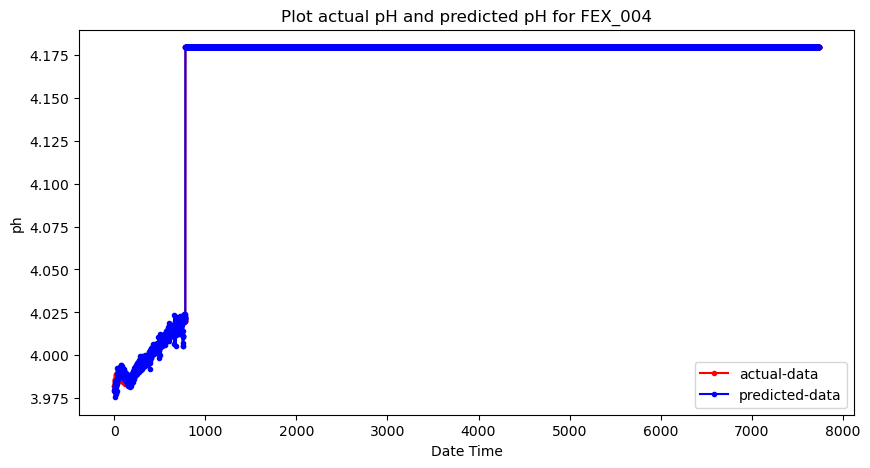

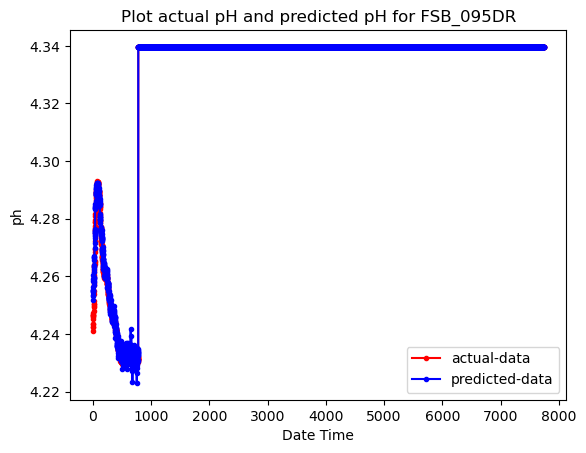

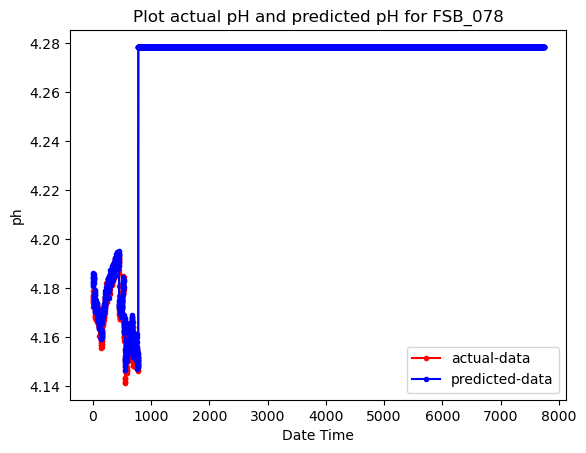

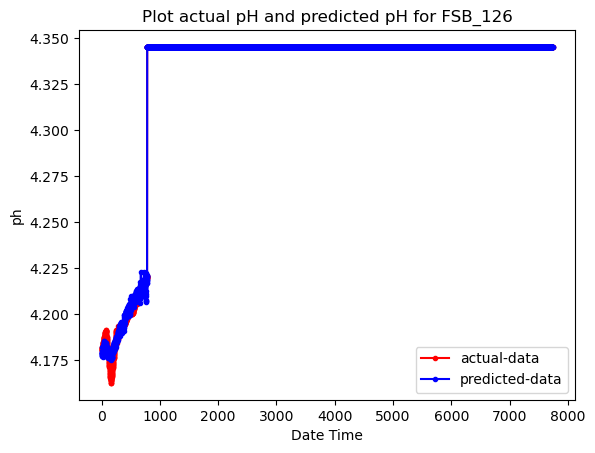

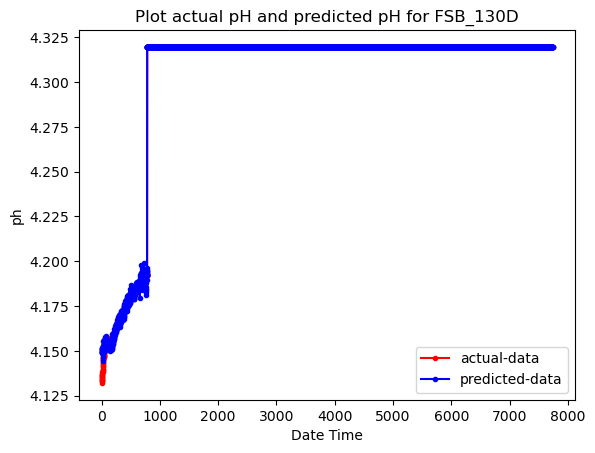

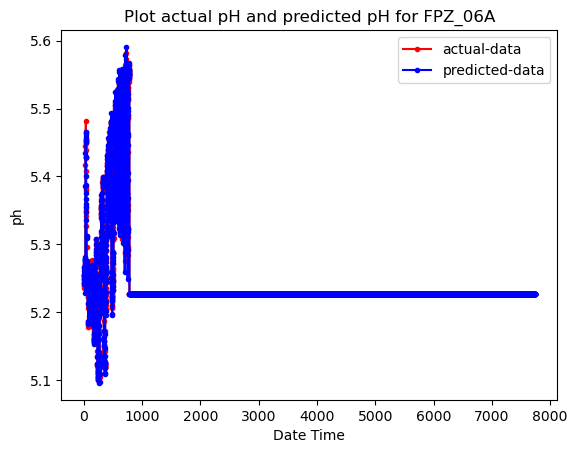

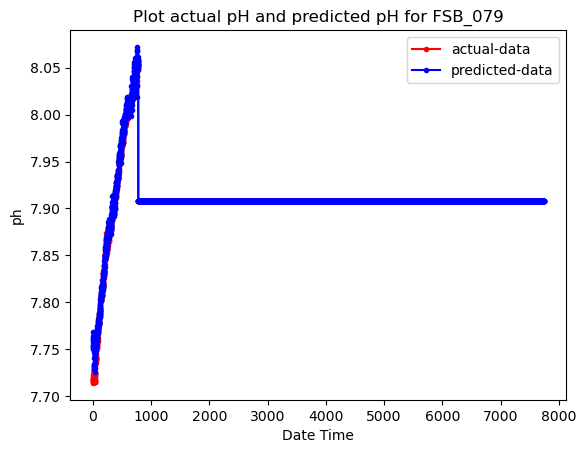

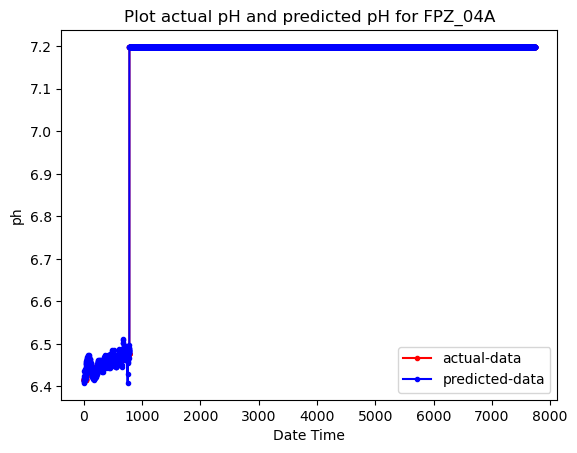

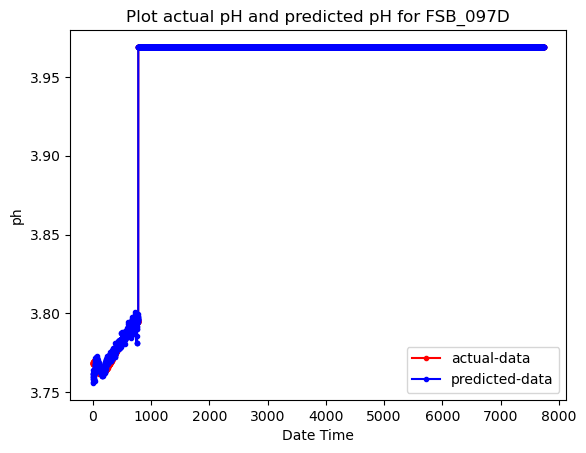

In [55]:
plt.figure(figsize=(10, 5))
for index in range(9):
    plt.plot(y_act[:,index], marker='.', color="red", label="actual-data")
    plt.plot(y_pred[:, index], marker='.', color="blue", label = "predicted-data")


    plt.xlabel('Date Time')
    plt.ylabel('ph')
    plt.title(f'Plot actual pH and predicted pH for {index_name[index]}')
    plt.legend()
    plt.show()